In [318]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [319]:
Df = pd.read_csv('Faellesdata_cleaned.csv')

In [320]:
x_train, x_test, y_train, y_test = train_test_split(Df.drop('IsMigratorInt', axis=1), Df['IsMigratorInt'], test_size=0.2, random_state=42)

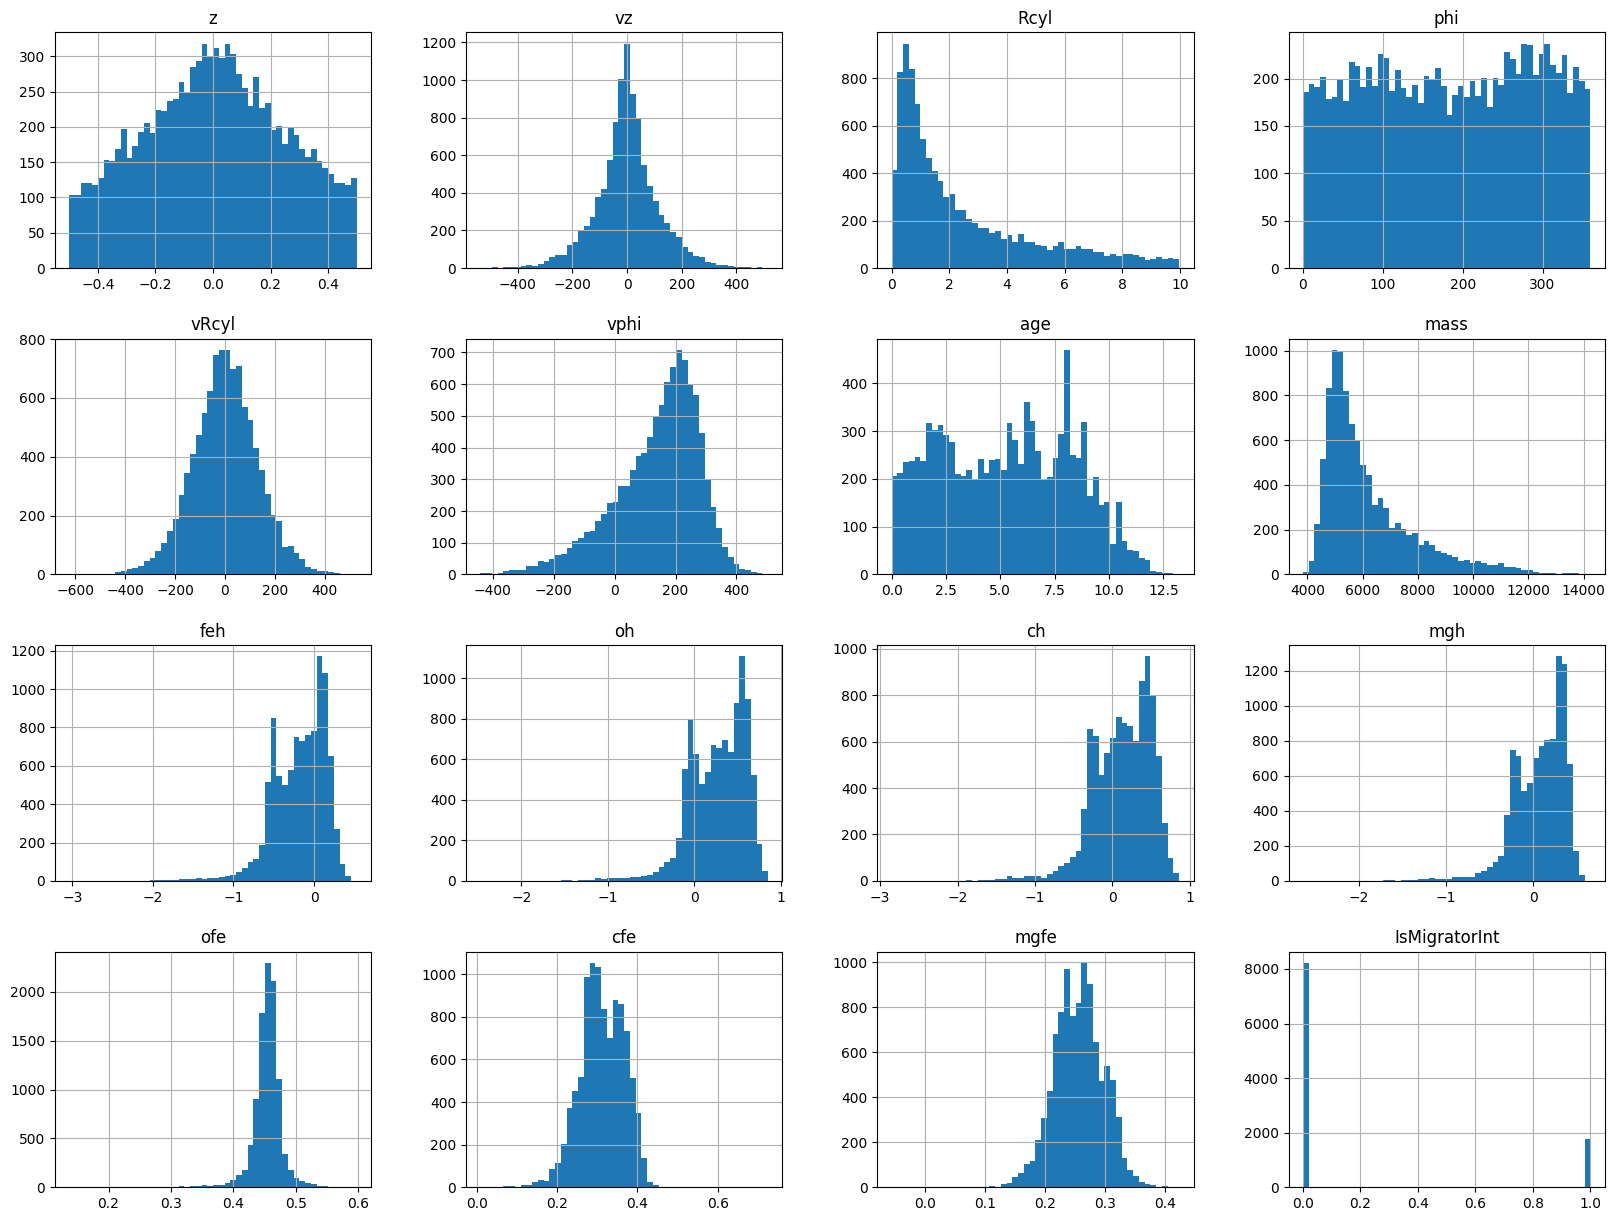

In [321]:
Df.hist(bins = 50, figsize = (20, 15));
#plt.savefig("Histograms")

In [322]:
import statsmodels.api as sm
import time
import itertools
from ISLP.models import (ModelSpec as MS,
                         summarize, poly)

In [323]:
#Make dataframe thats called DataFinal that has x_train and y_train
DataFinal = x_train
DataFinal['IsMigratorInt'] = y_train


In [324]:
DataFinalTest = x_test
DataFinalTest['IsMigratorInt'] = y_test

In [ ]:
# Found on google
def processSubset(feature_set):
    # Fit model on feature_set and calculate Cross entropy
    X = MS(list(feature_set)).fit_transform(DataFinal[list(feature_set)])
    model = sm.GLM(
        DataFinal["IsMigratorInt"]
        , X
        , family = sm.families.Binomial()
        )
    regr = model.fit()
    
    maskIsMigrator = y_test == 1
    maskIsNotMigrator = y_test == 0
    predictions = regr.predict(sm.add_constant(DataFinalTest[list(feature_set)]))
    
    CrossEntropy = np.mean(
        y_test[maskIsMigrator]*np.log(predictions[maskIsMigrator])
        ) + np.mean(
            (1-y_test[maskIsNotMigrator])*np.log(predictions[maskIsNotMigrator])
            )
    return {"model": regr, "CrossEntropy": CrossEntropy}

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(DataFinal.iloc[:,:-2], k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['CrossEntropy'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [326]:
models_best = pd.DataFrame(columns=["model", "CrossEntropy"])

tic = time.time()
# getBest(1)
for i in range(len(DataFinal.iloc[:,:-1].columns)):
    models_best.loc[i] = getBest(i)
 
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 1 models on 0 predictors in 0.006430864334106445 seconds.
Processed 14 models on 1 predictors in 0.14345645904541016 seconds.
Processed 91 models on 2 predictors in 1.3298418521881104 seconds.
Processed 364 models on 3 predictors in 4.1669347286224365 seconds.
Processed 1001 models on 4 predictors in 12.315610885620117 seconds.
Processed 2002 models on 5 predictors in 28.630688428878784 seconds.
Processed 3003 models on 6 predictors in 51.853570222854614 seconds.
Processed 3432 models on 7 predictors in 66.40001058578491 seconds.
Processed 3003 models on 8 predictors in 64.86419153213501 seconds.
Processed 2002 models on 9 predictors in 47.011411905288696 seconds.
Processed 1001 models on 10 predictors in 28.80487585067749 seconds.
Processed 364 models on 11 predictors in 9.759122133255005 seconds.
Processed 91 models on 12 predictors in 2.650754690170288 seconds.
Processed 14 models on 13 predictors in 0.5290324687957764 seconds.
Processed 1 models on 14 predictors in 0.0408

In [327]:
Outcome = models_best.apply(lambda row: row["model"].params, axis=1) # get the parameters of the best model for each number of predictors
Outcome = pd.DataFrame(Outcome)
Outcome.to_csv('OutcomeBestSubsetSelection.csv')
Outcome

,Rcyl,age,cfe,ch,feh,intercept,mass,mgh,ofe,oh,phi,vRcyl,vphi,vz,z
0,NaN,NaN,NaN,NaN,NaN,-1.531514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,-1.439697,NaN,NaN,-1.083810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-1.431784,NaN,NaN,-1.086839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000544,NaN
3,NaN,NaN,-1.421849,NaN,NaN,-1.091289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000538,0.165220
4,NaN,NaN,NaN,NaN,NaN,-3.363747,NaN,-10.392361,NaN,9.513717,NaN,NaN,NaN,-0.000580,0.183058
5,NaN,NaN,NaN,NaN,NaN,-3.356309,NaN,-10.347866,NaN,9.474044,NaN,-0.000162,NaN,-0.000578,0.183944
6,NaN,NaN,NaN,NaN,NaN,-3.534988,0.000073,-9.035938,NaN,8.095829,NaN,-0.000163,NaN,-0.000578,0.179995
7,NaN,NaN,NaN,NaN,NaN,-3.686586,0.000073,-8.990933,NaN,8.048394,0.000847,-0.000164,NaN,-0.000590,0.174377
8,NaN,NaN,-61.247811,56.691124,-56.383600,-0.959235,0.000117,NaN,NaN,NaN,0.000852,-0.000230,NaN,-0.000555,0.156785
9,NaN,NaN,-51.202443,46.591982,-56.470829,-3.757934,0.000131,11.416094,NaN,NaN,0.000889,-0.000265,NaN,-0.000551,0.147878


In [328]:
# TEMSE = models_best[['TErate', 'MSEtest']]
models_best['CrossEntropy'].to_csv('CrossEntropy.csv')
models_best['CrossEntropy']

0     3.454504
1     3.450579
2     3.449922
3     3.449421
4     3.451987
5     3.454284
6     3.458087
7     3.464677
8     3.473603
9     3.493547
10    3.511254
11    3.545338
12    3.572206
13    3.727351
14    3.765621
Name: CrossEntropy, dtype: object

In [329]:
from sklearn.metrics import accuracy_score

In [330]:
bic = models_best.apply(lambda row: row["model"].bic_llf, axis=1) # get the BIC of the best model for each number of predictors
aic = models_best.apply(lambda row: row["model"].aic, axis=1) # get the Mallow's Cp of the best model for each number of predictors

def Accuracy(row):
    indecies = [item for item in list(row["model"].params.index) if item != 'intercept']
    predictions = row["model"].predict(sm.add_constant(x_test[indecies]))
    return accuracy_score(y_test, predictions > 0.5)

AccuracyTestData = models_best.apply(Accuracy, axis=1)

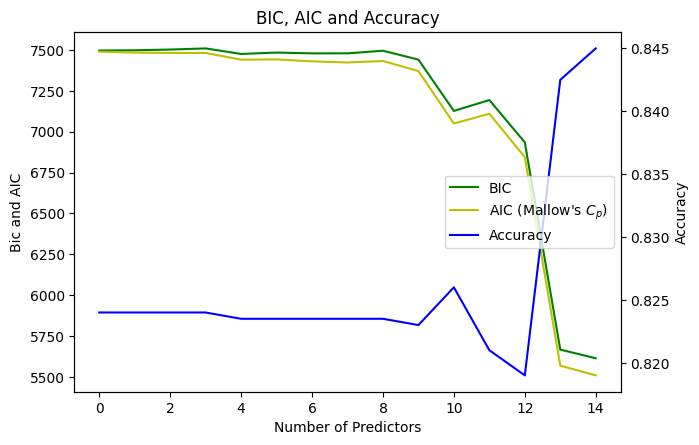

In [331]:
fig, ax1 = plt.subplots(figsize=(7, 5))

fig.tight_layout(pad=4.0)

ax2 = ax1.twinx()
BicPlot, = ax1.plot(bic, 'g-', label = "BIC")
AicPlot, = ax1.plot(aic, 'y-', label = "AIC (Mallow's $C_p$)")
AccuracyPlot, = ax2.plot(AccuracyTestData, 'b-', label="Accuracy")

plt.legend([BicPlot, AicPlot, AccuracyPlot], ['BIC', 'AIC (Mallow\'s $C_p$)', 'Accuracy'], loc = 'center right')

ax1.set_xlabel('Number of Predictors')
ax1.set_ylabel('Bic and AIC')
ax2.set_ylabel('Accuracy')
plt.title("BIC, AIC and Accuracy")
plt.savefig("BICAICandAccuracy")

In [332]:
print(bic.idxmin()) #Finds where minimum  and maximum values are
print(aic.idxmin())
print(AccuracyTestData.idxmax())

14
14
14


In [333]:
def Accuracy(row):
    indecies = [item for item in list(row["model"].params.index) if item != 'intercept']
    predictions = row["model"].predict(sm.add_constant(x_test[indecies]))
    return accuracy_score(y_test, predictions > 0.5)

AccuracyTestData = models_best.apply(Accuracy, axis=1)
AccuracyTestData
# i= 0
# asd = [item for item in list(models_best["model"][i].params.index) if item != 'intercept']
# # asd.remove('intercept')
# print(asd)
# models_best["model"][i].predict(sm.add_constant(x_test[asd]))
# accuracy_score(y_test, models_best["model"][i].predict(sm.add_constant(x_test[asd])) > 0.5)
# print()

# accuracy_score(y_test, )
# Accuracy = models_best.apply(lambda row: row["model"], axis=1) # get the parameters of the best model for each number of predictors


0     0.8240
1     0.8240
2     0.8240
3     0.8240
4     0.8235
5     0.8235
6     0.8235
7     0.8235
8     0.8235
9     0.8230
10    0.8260
11    0.8210
12    0.8190
13    0.8425
14    0.8450
dtype: float64